# Importing and Splitting Data

In [1]:
# import packages
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# create a python list
_headers = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'car']

In [3]:
# url path
url_path = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter06/Dataset/car.data'

In [4]:
# load data
df = pd.read_csv(url_path, names=_headers, index_col=None)
df.head()

,buying,maint,doors,persons,lug_boot,safety,car
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
# Create a training and an evaluation DataFrame
training, evaluation = train_test_split(df, test_size=0.3)

In [6]:
# Create a validation and test dataset
validation, test = train_test_split(evaluation, test_size=0.5, random_state=0)

# Computing the R2 Score of a Linear Regression Model

In [7]:
# import packages
from sklearn.linear_model import LinearRegression

In [8]:
# create a list
_headers = ['CIC0', 'SM1', 'GATS1i', 'NdsCH', 'Ndssc', 'MLOGP', 'response']

In [9]:
# url_path
url_path = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter06/Dataset/qsar_fish_toxicity.csv'

In [10]:
# load data
df = pd.read_csv(url_path, names=_headers, sep=';')
df.head()

,CIC0,SM1,GATS1i,NdsCH,Ndssc,MLOGP,response
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [11]:
# Split the data into features and labels
features = df.drop('response', axis=1).values
labels = df[['response']].values

In [12]:
# split the data into training and evaluation datasets
X_train, X_eval, y_train, y_eval = train_test_split(features,
                                                    labels,
                                                    test_size=0.2,
                                                    random_state=0)

X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, random_state=0)

In [13]:
# create a linear regression model
model = LinearRegression()

In [14]:
# train the model
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# make predictions
y_pred = model.predict(X_val)

In [16]:
# compute R squared
r2 = model.score(X_val, y_val)
print(f'R^2 score: {r2}')

R^2 score: 0.5623861754188693


In [17]:
# Compare the predictions to the actual ground truth
_ys = pd.DataFrame(dict(actuals=y_val.reshape(-1), predicted=y_pred.reshape(-1)))
_ys.head()

,actuals,predicted
0,3.742,4.155885
1,6.143,6.398238
2,4.674,5.183181
3,4.865,3.771333
4,4.732,4.593059


# Computing the MAE of a Model

In [18]:
# import package
from sklearn.metrics import mean_absolute_error

In [19]:
# compute MAE
mae = mean_absolute_error(y_val, y_pred)
print(f'MAE: {mae}')

MAE: 0.7243440846447938


# Computing the Mean Absolute Error of a Second Model

In [20]:
# import packages
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

In [21]:
# create a pipeline
steps = [
    ('scaler', MinMaxScaler()),
    ('poly', PolynomialFeatures(2)),
    ('model', LinearRegression())
]

In [22]:
model = Pipeline(steps)

In [23]:
# train the model
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('poly', PolynomialFeatures()),
                ('model', LinearRegression())])

In [24]:
# make predictions
y_pred = model.predict(X_val)

In [25]:
# compute MAE
mae = mean_absolute_error(y_val, y_pred)
print(f'MAE: {mae}')

MAE: 0.6605526100836077


In [26]:
# compute R squared
r2 = model.score(X_val, y_val)
print(f'R^2: {r2}')

R^2: 0.6284921344153389


# Creating a Classification Model for Computing Evaluation Metrics

In [27]:
# import package
from sklearn.linear_model import LogisticRegression

In [28]:
_headers = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'car']

In [29]:
# url path
url_path = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter06/Dataset/car.data'

In [30]:
df = pd.read_csv(url_path, names=_headers, index_col=None)
df.head()

,buying,maint,doors,persons,lug_boot,safety,car
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [31]:
df.loc[ df['doors'] == '5more' ]['doors']

81      5more
82      5more
83      5more
84      5more
85      5more
        ...  
1723    5more
1724    5more
1725    5more
1726    5more
1727    5more
Name: doors, Length: 432, dtype: object

In [32]:
df.loc[81:1728, 'doors'] = 0
df

,buying,maint,doors,persons,lug_boot,safety,car
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,0,more,med,med,good
1724,low,low,0,more,med,high,vgood
1725,low,low,0,more,big,low,unacc
1726,low,low,0,more,big,med,good


In [33]:
# Encode categorical variables
_df = pd.get_dummies(df, columns=['buying', 'maint', 'persons', 'lug_boot', 'safety'])
_df.head()

,doors,car,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,2,unacc,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0
1,2,unacc,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1
2,2,unacc,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0
3,2,unacc,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0
4,2,unacc,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1


In [34]:
# split the data into training and evaluation sets
features = _df.drop('car', axis=1).values
labels = _df['car'].values

X_train, X_eval, y_train, y_eval = train_test_split(features, labels,
                                                    test_size=0.3,
                                                    random_state=0)

X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval,
                                                test_size=0.5,
                                                random_state=0)

In [35]:
# train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
# make predictions
y_pred = model.predict(X_val)

# Generating a Confusion Matrix for the Classification Model

In [37]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix

In [38]:
# generate a confusion matrix
confusion_matrix(y_val, y_pred)

array([[ 41,   1,   9,   0],
       [  7,   2,   0,   1],
       [ 13,   0, 172,   0],
       [  2,   0,   0,  11]], dtype=int64)

# Computing Precision for the Classification Model

In [39]:
# import package
from sklearn.metrics import precision_score

In [40]:
# compute precision score
precision_score(y_val, y_pred, average='macro')

0.7961008068052267

# Computing Recall for the Classification Model

In [41]:
# import packages
from sklearn.metrics import recall_score

In [42]:
# compute recall
recall_score(y_val, y_pred, average='macro')

0.6949512861277567

# Computing the F1 Score for the Classification Model

In [43]:
# import package
from sklearn.metrics import f1_score

In [44]:
# compute f1 score
f1_score(y_val, y_pred, average='macro')

0.7117203159222141

# Computing Model Accuracy for the Classification Model

In [45]:
# import package
from sklearn.metrics import accuracy_score

In [46]:
# compute accuracy score
accuracy_score(y_val, y_pred)

0.8725868725868726

# Computing the Log Loss for the Classification Model

In [47]:
# import package
from sklearn.metrics import log_loss

In [48]:
# compute log_loss
log_loss(y_val, model.predict_proba(X_val))

0.23790909623665857

# Computing and Plotting ROC Curve for a Binary Classification Problem

In [49]:
# import packages
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [50]:
# create a list
_headers = ['Age', 'Delivery_Nbr', 'Delivery_Time', 'Blood_Pressure', 'Heart_Problem', 'Caesarian']

In [51]:
# url path
url_path = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter06/Dataset/caesarian.csv.arff'

In [52]:
# load data
df = pd.read_csv(url_path, names=_headers, index_col=None, skiprows=15)
df.head()

,Age,Delivery_Nbr,Delivery_Time,Blood_Pressure,Heart_Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [53]:
# split the data
features = df.drop(['Caesarian'], axis=1).values
labels = df[['Caesarian']].values

X_train, X_eval, y_train, y_eval = train_test_split(features, labels,
                                                   test_size=0.2,
                                                   random_state=0)

X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval,
                                               test_size=0.5,
                                               random_state=0)

In [54]:
# create the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [55]:
# make predictions
y_proba = model.predict_proba(X_val)

In [56]:
# Compute the true positive rate, the false positive rate, and the thresholds
_false_positive, _true_positive, _threshold = roc_curve(y_val, y_proba[:, 0])

print(f'False positive:\n{_false_positive}')
print(f'True Positive:\n{_true_positive}')
print(f'Thershold:\n{_threshold}')

False positive:
[0.  0.  0.  0.5 0.5 1.  1. ]
True Positive:
[0.         0.16666667 0.33333333 0.33333333 0.83333333 0.83333333
 1.        ]
Thershold:
[1.55519917 0.55519917 0.55005086 0.48008433 0.32085037 0.22083119
 0.19657847]


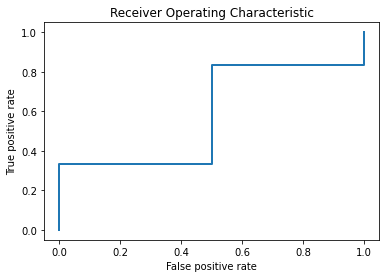

In [57]:
# plot ROC curve
import matplotlib.pyplot as plt
plt.plot(_false_positive, _true_positive, lw=2, label='Receiver Operating Characteristic')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.show()

# Computing the ROC AUC for the Caesarian Dataset

In [58]:
# compute ROC AUC
from sklearn.metrics import roc_auc_score
_auc = roc_auc_score(y_val, y_proba[:, 0])
print(_auc)

0.5833333333333334


# Saving and Loading a Model

In [59]:
_headers = ['CIC0', 'SM1', 'GATS1i', 'NdsCH', 'Ndssc', 'MLOGP', 'response']

In [60]:
# url path
url_path = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter06/Dataset/qsar_fish_toxicity.csv'

In [61]:
# load data
df = pd.read_csv(url_path, names=_headers, sep=';')
df.head()

,CIC0,SM1,GATS1i,NdsCH,Ndssc,MLOGP,response
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [62]:
# split the data
features = df.drop('response', axis=1).values
labels = df[['response']].values

X_train, X_eval, y_train, y_eval = train_test_split(features, labels,
                                                   test_size=0.2,
                                                   random_state=0)

X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, random_state=0)

In [63]:
# create the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [64]:
# make predictions
y_pred = model.predict(X_val)

In [65]:
# import package
import joblib

In [66]:
# save the model
joblib.dump(model, 'model.joblib')

['model.joblib']

In [67]:
# load a new model
m2 = joblib.load('model.joblib')

In [68]:
# use the new model to make predictions
m2_preds = m2.predict(X_val)

In [69]:
# compare predictions
ys = pd.DataFrame(dict(predicted=y_pred.reshape(-1), m2=m2_preds.reshape(-1)))
ys.head()

,predicted,m2
0,4.155885,4.155885
1,6.398238,6.398238
2,5.183181,5.183181
3,3.771333,3.771333
4,4.593059,4.593059
